In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext tensorboard

In [3]:
## Install python3.7 for the codes to work

## Load the python modeules

import os
import sys
import warnings
import logging
import pickle
import re
from dataclasses import dataclass

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (20, 10)})
sns.set_style("whitegrid")


import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)

from stats import Stats, Otherstats
from transformer import Transform
from model import Model



warnings.filterwarnings('ignore')

#logging.basicConfig(level=logging.INFO, stream=sys.stdout)

Using TensorFlow backend.


#### Load the data

In [4]:
df = pd.read_csv('Book1.csv', sep=",")

In [5]:
df.head()

"""date""  ""Appliances""  ""lights""  ""T1""   ""RH_1""  \
0  "2016-01-11 17:00:00  60.0            30.0        19.89   47.596667   
1  "2016-01-11 17:10:00  60.0            30.0        19.89   46.693333   
2  "2016-01-11 17:20:00  50.0            30.0        19.89   46.300000   
3  "2016-01-11 17:30:00  50.0            40.0        19.89   46.066667   
4  "2016-01-11 17:40:00  60.0            40.0        19.89   46.333333   

   ""T2""   ""RH_2""  ""T3""   ""RH_3""     ""T4""  ...     ""T9""  ""RH_9""  \
0  19.2    44.790000  19.79   44.730000  19.000000  ...  17.033333  45.53      
1  19.2    44.722500  19.79   44.790000  19.000000  ... NaN         45.56      
2  19.2    44.626667  19.79   44.933333  18.926667  ...  17.000000  45.50      
3  19.2    44.590000  19.79   45.000000  18.890000  ...  17.000000  45.40      
4  19.2    44.530000  19.79   45.000000  18.890000  ...  17.000000  45.40      

   ""T_out""  ""Press_mm_hg""  ""RH_out""  ""Windspeed""  ""Visibility""  \
0  6.600000   733.5            92.0        7.000000       63.000000        
1  6.483333   733.6            92.0        6.666667      NaN               
2  6.366667  NaN               92.0        6.333333       55.333333        
3  6.250000   733.8           NaN          6.000000       51.500000        
4  6.133333   733.9           NaN          5.666667       47.666667        

   ""Tdewpoint""    ""rv1""           ""rv2"""  
0  5.3            13.275433  13.275433157105"   
1  5.2            18.606195  18.6061949818395"  
2  5.1            28.642668  28.6426681675948"  
3  5.0            45.410390  45.4103894997388"  
4  4.9            10.084097  10.0840965518728"  

[5 rows x 29 columns]

**Inference**   
The dataframe headers need to be clean. date and rv2 columns also need to to be cleaned. There are double quotation marks at beginning of date values and end of rv2 values.

#### Clean the dataframe headers

In [6]:
regex = re.compile(r'"')


df.columns =  [regex.sub('', colname) for colname in df.columns]

#### Clean date and rv2

In [7]:
df['date'] = pd.to_datetime(df['date'].apply(lambda x: regex.sub('', x)))

df['rv2'] = df['rv2'].apply(lambda x: regex.sub('', x))

df.sample(6)

date  Appliances  lights         T1   RH_1     T2   RH_2  \
6966  2016-02-29 02:00:00  50.0        0.0     19.700000  33.70  17.70  34.90   
8411  2016-03-10 02:50:00  50.0        0.0     20.200000  36.90  17.29  40.09   
9597  2016-03-18 08:30:00 NaN         NaN     NaN        NaN    NaN    NaN      
12858 2016-04-10 00:00:00  60.0        0.0     22.200000  40.79  19.70  43.90   
13325 2016-04-13 05:50:00  190.0       10.0   NaN        NaN    NaN    NaN      
12425 2016-04-06 23:50:00  60.0        0.0     21.426667  41.79  18.89  44.29   

              T3       RH_3     T4  ...     T9       RH_9     T_out  \
6966   19.533333  35.590000  18.70  ...  18.20  40.326667  1.400000   
8411   20.166667  37.163333  20.89  ...  17.39  38.590000  0.950000   
9597  NaN        NaN        NaN     ... NaN    NaN         2.300000   
12858  22.823333  39.700000  20.50  ...  20.10  40.230000  7.100000   
13325 NaN        NaN        NaN     ... NaN    NaN         5.450000   
12425  22.790000  39.500000  21.10  ...  20.50  41.030000  7.183333   

       Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
6966   760.900000   73.000000  6.000000   40.000000  -2.900000   49.075413   
8411   752.700000   86.166667 NaN         20.333333  -1.166667   1.101828    
9597   763.500000   99.500000  3.000000   8.500000    2.250000   34.029708   
12858  750.700000   93.000000  2.000000   40.000000   6.000000   16.033227   
13325  750.250000   90.166667  1.000000   40.000000   3.983333   35.138531   
12425  751.783333   79.500000  5.333333   28.166667   3.866667   19.229591   

                    rv2  
6966   49.0754127269611  
8411   1.10182802891359  
9597   34.0297079994343  
12858  16.0332266357727  
13325  35.1385311339982  
12425  19.2295906716026  

[6 rows x 29 columns]

In [8]:
df.dtypes

date           datetime64[ns]
Appliances     float64       
lights         float64       
T1             float64       
RH_1           float64       
T2             float64       
RH_2           float64       
T3             float64       
RH_3           float64       
T4             float64       
RH_4           float64       
T5             float64       
RH_5           float64       
T6             float64       
RH_6           float64       
T7             float64       
RH_7           float64       
T8             float64       
RH_8           float64       
T9             float64       
RH_9           float64       
T_out          float64       
Press_mm_hg    float64       
RH_out         float64       
Windspeed      float64       
Visibility     float64       
Tdewpoint      float64       
rv1            float64       
rv2            object        
dtype: object

**Inference**  
The date has been converted to proper datetime format.

In [9]:
print(f'The total number of observations: {len(df)}')

The total number of observations: 19735


In [10]:
#Using stats package to summarise the data
stat = Stats(df)

#### What are Percentages of missing values of the columns

In [11]:
stat.check_feature_missing_values()

I1003 13:06:29.801826 4673914304 logger.py:27] Run Successful


{'date': '0.0%',
 'Appliances': '5.83%',
 'lights': '6.39%',
 'T1': '18.36%',
 'RH_1': '18.26%',
 'T2': '18.99%',
 'RH_2': '17.04%',
 'T3': '18.4%',
 'RH_3': '17.29%',
 'T4': '14.16%',
 'RH_4': '17.77%',
 'T5': '15.97%',
 'RH_5': '15.77%',
 'T6': '19.5%',
 'RH_6': '15.53%',
 'T7': '18.96%',
 'RH_7': '21.88%',
 'T8': '20.86%',
 'RH_8': '15.15%',
 'T9': '16.44%',
 'RH_9': '17.57%',
 'T_out': '7.19%',
 'Press_mm_hg': '14.04%',
 'RH_out': '9.31%',
 'Windspeed': '12.75%',
 'Visibility': '13.99%',
 'Tdewpoint': '11.23%',
 'rv1': '0.0%',
 'rv2': '0.0%'}

**Inference**   
It is only three variables (date, rv1 and rv2) that do not have missing values. One of the ways to deal with missing values is imputing, meaning that replace the missing values with mean, median or mode of the distribution

#### Check for Duplicates

In [12]:
stat.remove_duplicate()

I1003 13:06:30.083971 4673914304 logger.py:25] Result: there is no duplicates


'there is no duplicates'

In [13]:
stat.summary_neg()

**Inference**  
T6, T_out and Tdew_point have negative values. I assumed that these values are acceptable simce they are temperature and temperature could fall below zero.

In [14]:
cp_df = df.copy()
cp_df = cp_df.set_index('date')

#### Distribution of Appliances over time

In [15]:
#cp_df[['Appliances']].plot(title="Distribution of Appliance over time")
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [16]:
def distribute_over_time():
    hover = HoverTool(tooltips = [
       ('Appliances', "@Appliances"),
       ("date", "@date{%F}"),
      ], formatters={'date': 'datetime'})
    source = ColumnDataSource(df)
    p= figure(title='Distribution of Appliances over datetime',tools=[hover], plot_height=500, plot_width=1000, x_axis_type='datetime')
    p.line(x='date', y='Appliances', source=source)
    show(p)

In [17]:
distribute_over_time()

**Inference**  
The distribution over time seems followed the same pattern except huge gap between 2016-03-11 to 2016-03-20. The seven days of worth of data is not captioned or missing. It will be interesting to see distribution based on minute, hour since the data is collected at 10 minutes interval.  


#### Distribution of Average Appliances over day, dayofweek, hour and minute

In [18]:
Ostats = Otherstats()   
new_cp_df = Ostats.generate_hour_n_minute(cp_df)
new_cp_df.head()

I1003 13:06:33.065441 4673914304 logger.py:27] Run Successful


Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00  60.0        30.0    19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00  60.0        30.0    19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00  50.0        30.0    19.89  46.300000  19.2  44.626667   
2016-01-11 17:30:00  50.0        40.0    19.89  46.066667  19.2  44.590000   
2016-01-11 17:40:00  60.0        40.0    19.89  46.333333  19.2  44.530000   

                        T3       RH_3         T4       RH_4  ...  RH_out  \
date                                                         ...           
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667  ...  92.0     
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500  ...  92.0     
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000  ...  92.0     
2016-01-11 17:30:00  19.79  45.000000  18.890000  45.723333  ... NaN       
2016-01-11 17:40:00  19.79  45.000000  18.890000  45.530000  ... NaN       

                     Windspeed  Visibility  Tdewpoint        rv1  \
date                                                               
2016-01-11 17:00:00  7.000000   63.000000   5.3        13.275433   
2016-01-11 17:10:00  6.666667  NaN          5.2        18.606195   
2016-01-11 17:20:00  6.333333   55.333333   5.1        28.642668   
2016-01-11 17:30:00  6.000000   51.500000   5.0        45.410390   
2016-01-11 17:40:00  5.666667   47.666667   4.9        10.084097   

                                  rv2  day  dayofweek  hour  minute  
date                                                                 
2016-01-11 17:00:00  13.275433157105   11   0          17    0       
2016-01-11 17:10:00  18.6061949818395  11   0          17    10      
2016-01-11 17:20:00  28.6426681675948  11   0          17    20      
2016-01-11 17:30:00  45.4103894997388  11   0          17    30      
2016-01-11 17:40:00  10.0840965518728  11   0          17    40      

[5 rows x 32 columns]

#### Average Distribution over Day

I1003 13:06:33.287050 4673914304 logger.py:27] Run Successful


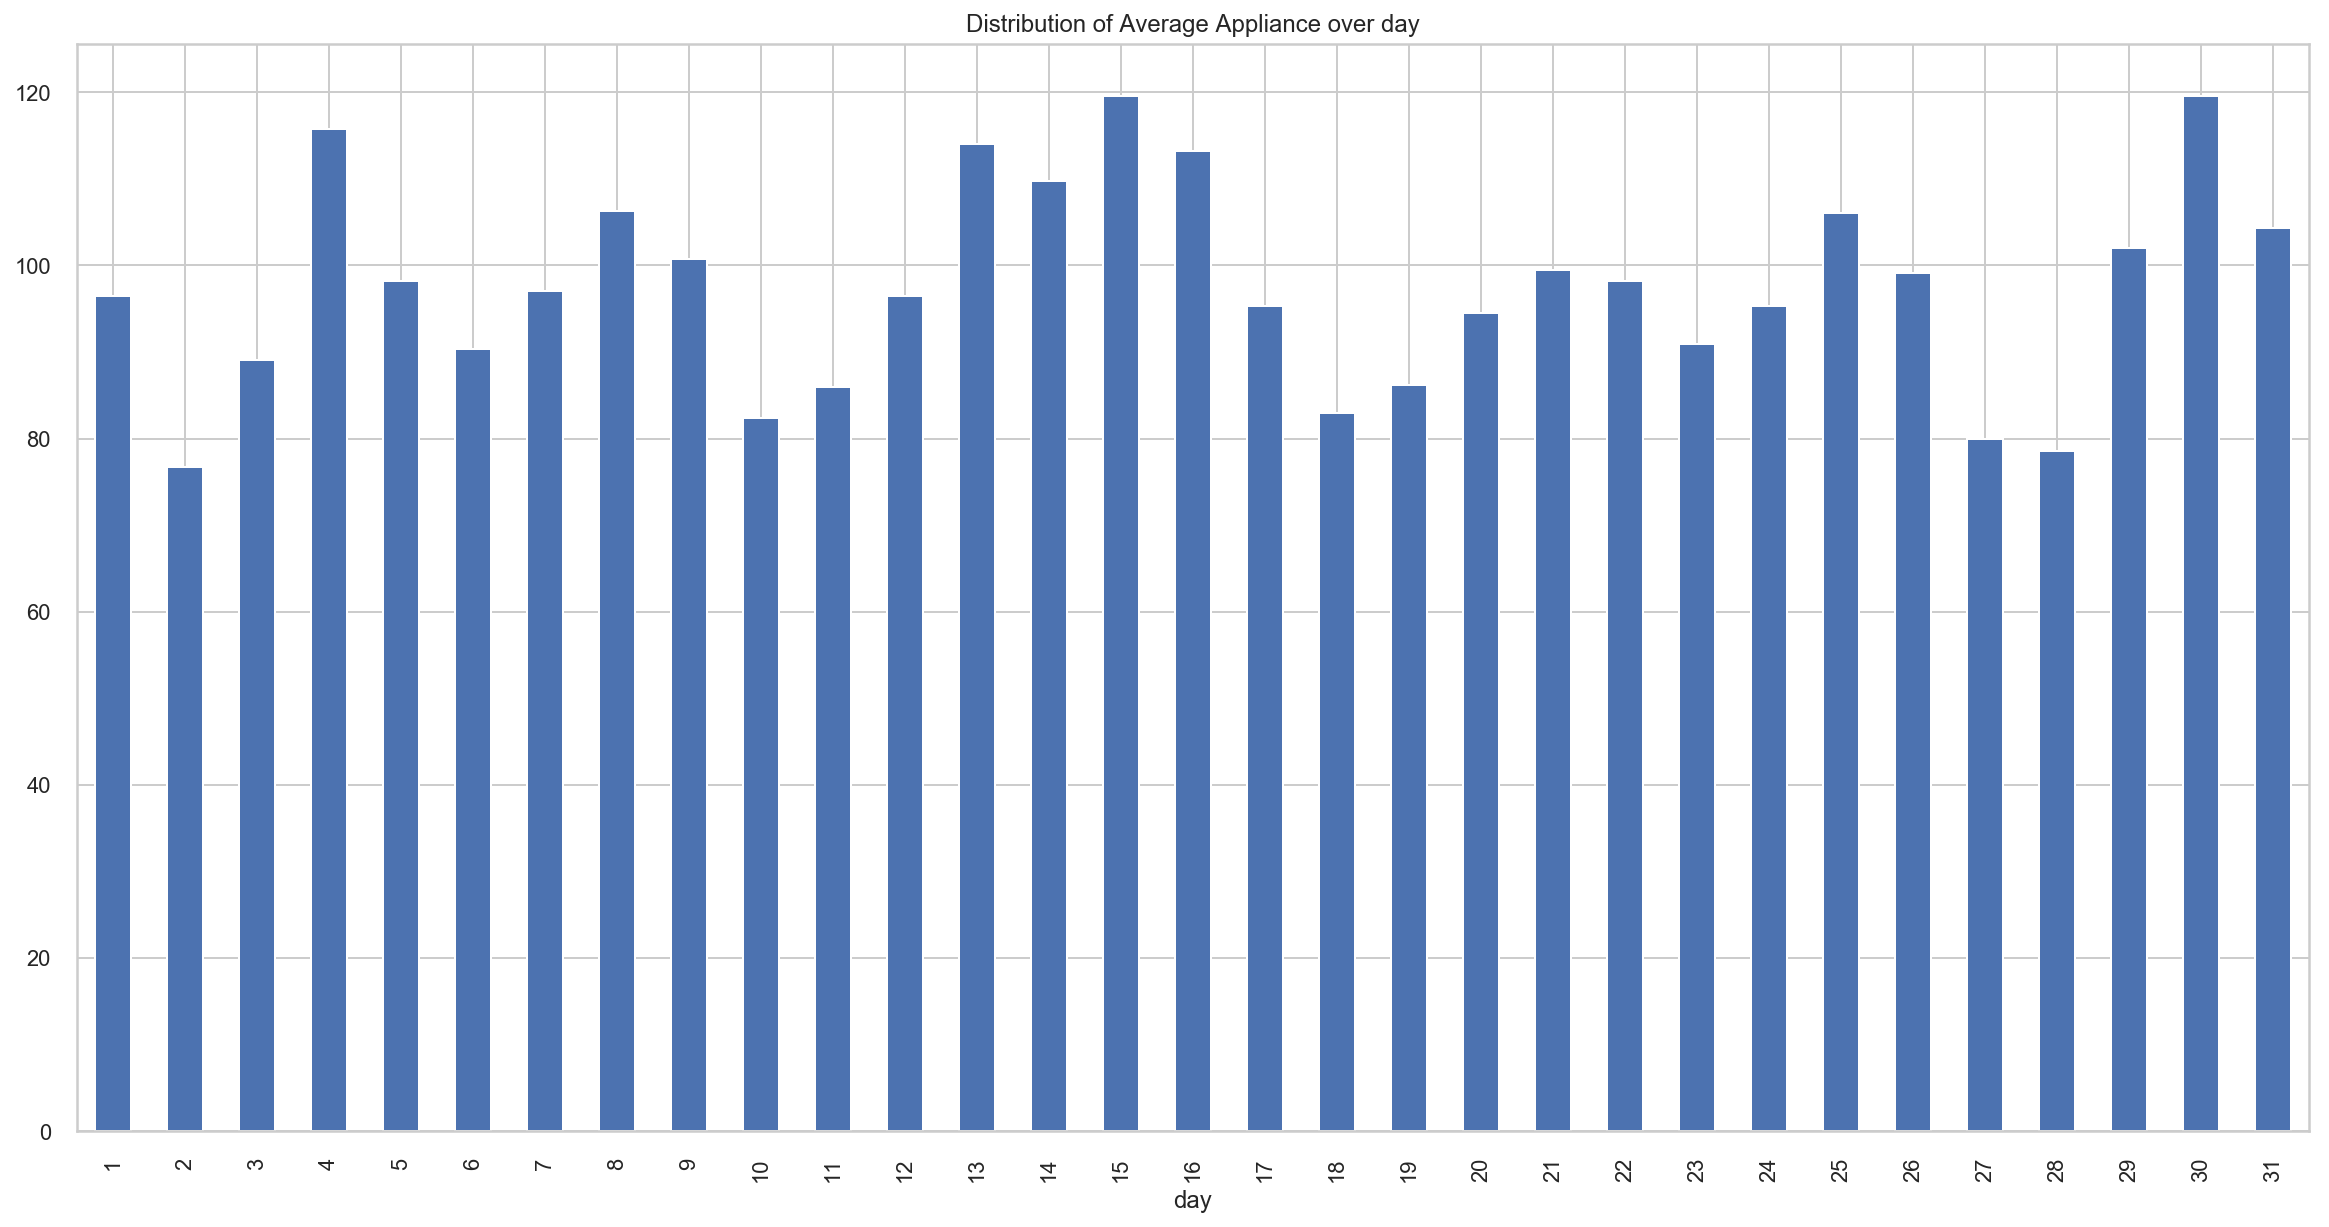

In [19]:
Ostats.dist_over_time_interval(new_cp_df, 'Appliances', 'day')

**Inference**  
The average daily energy comsumption of Appliances for 30 days. The pattern here hards to interpret

#### Average Distribution over Day of the Week

I1003 13:06:35.789453 4673914304 logger.py:27] Run Successful


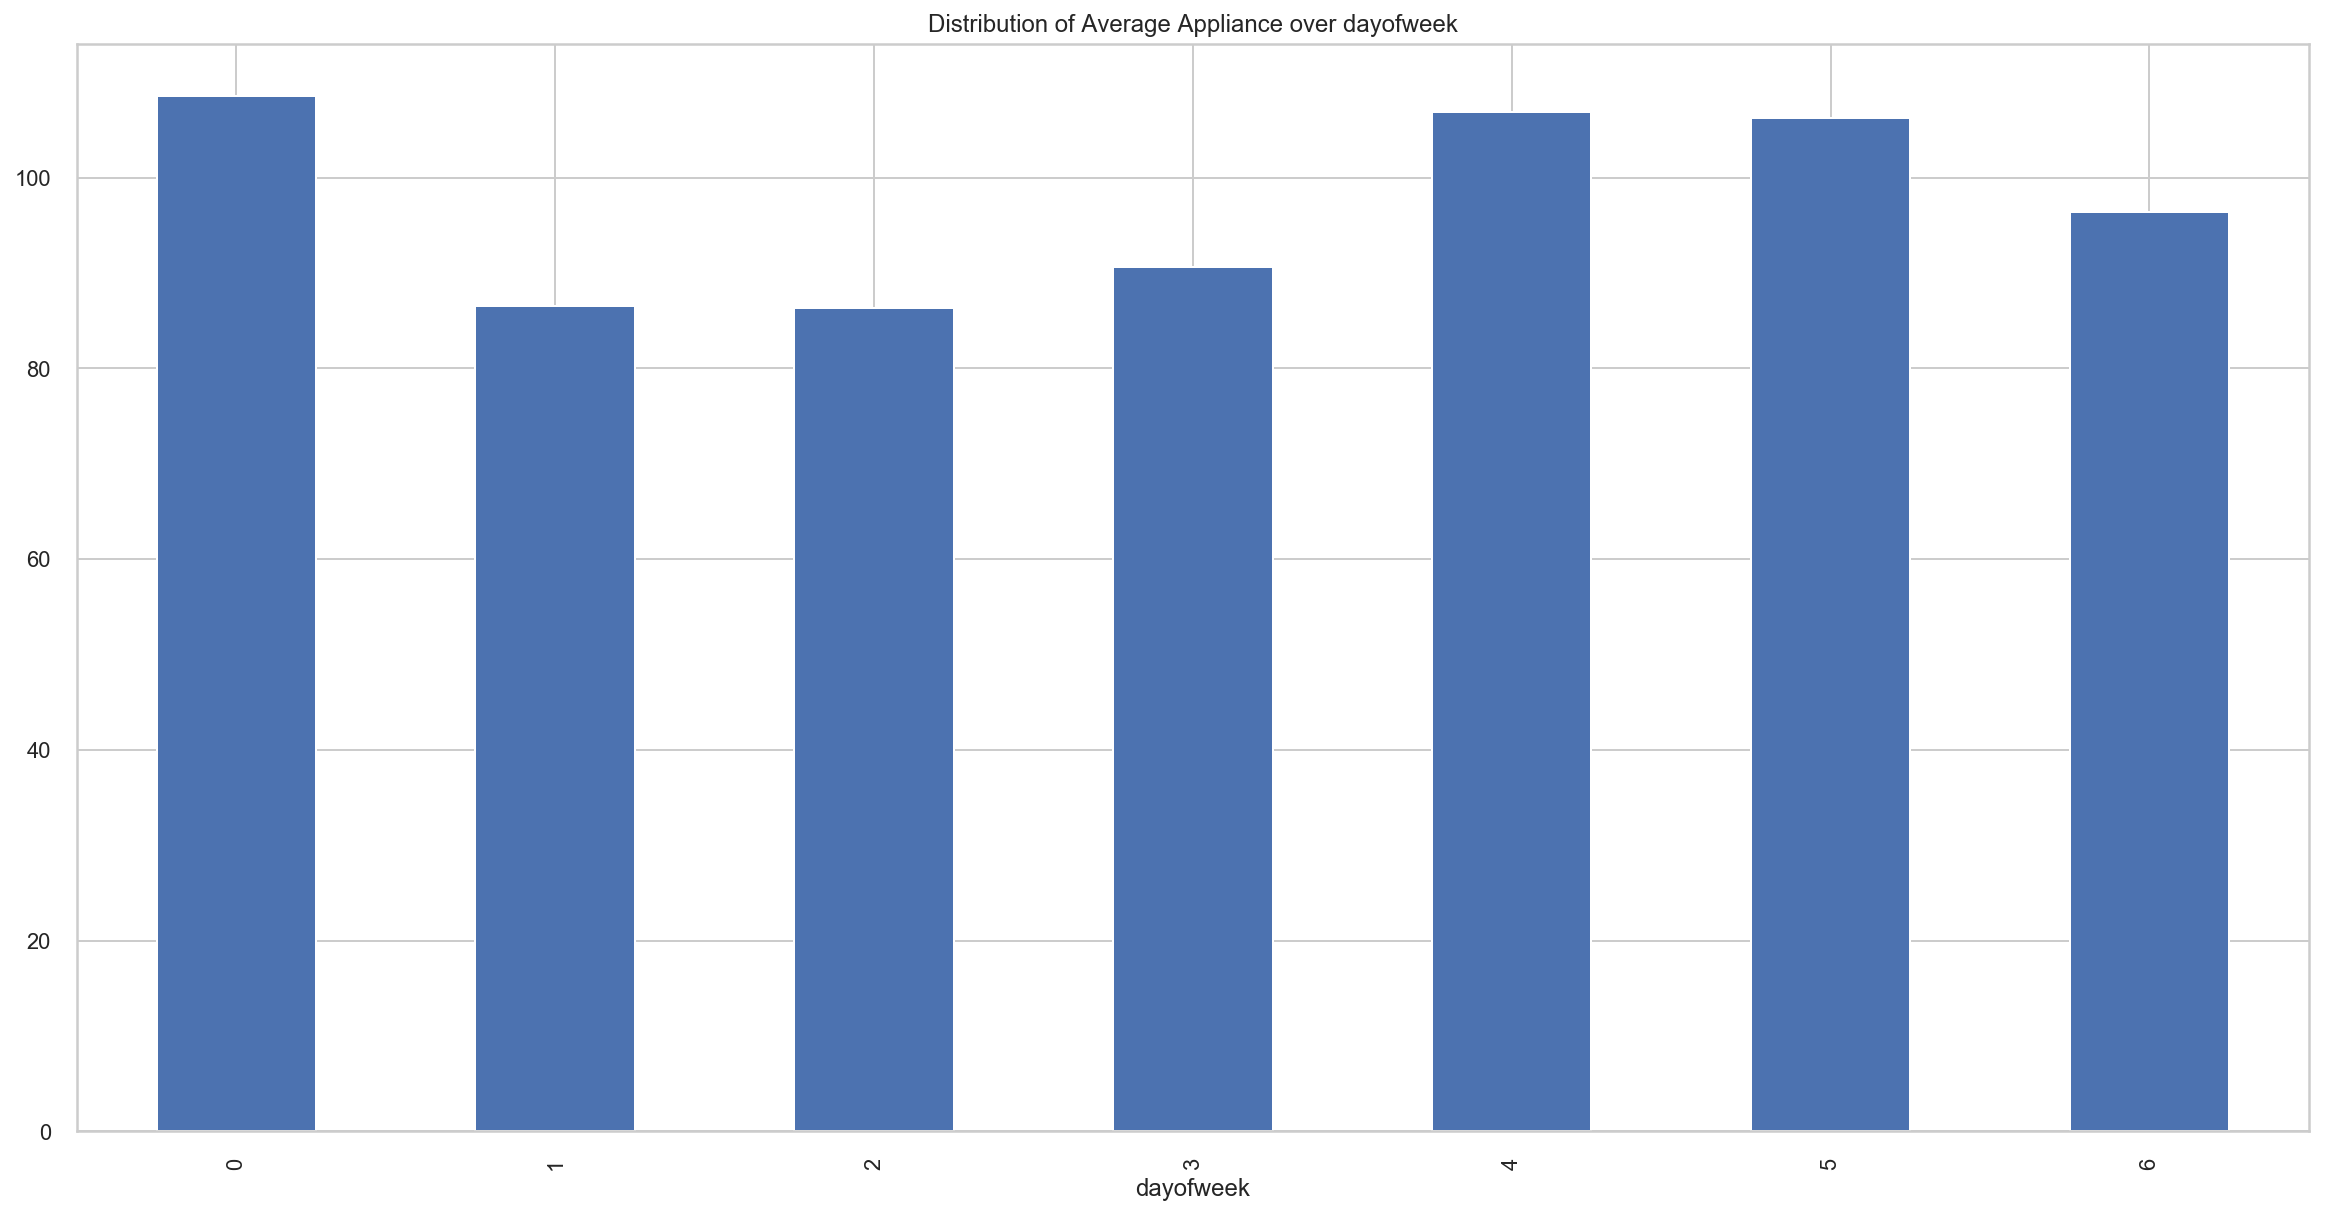

In [20]:
Ostats.dist_over_time_interval(new_cp_df, 'Appliances', 'dayofweek')

**Inference**  
The average energy consumption of Appliences on day of week. More energy consumed on Sunday(0), Thursday(4) and Friday(5) compare to other day of week. It makes sense to say that energy consumption starts going up on Wednesday. It is hard to know why at this stage.

#### Average Distribution over Hour

I1003 13:06:37.343914 4673914304 logger.py:27] Run Successful


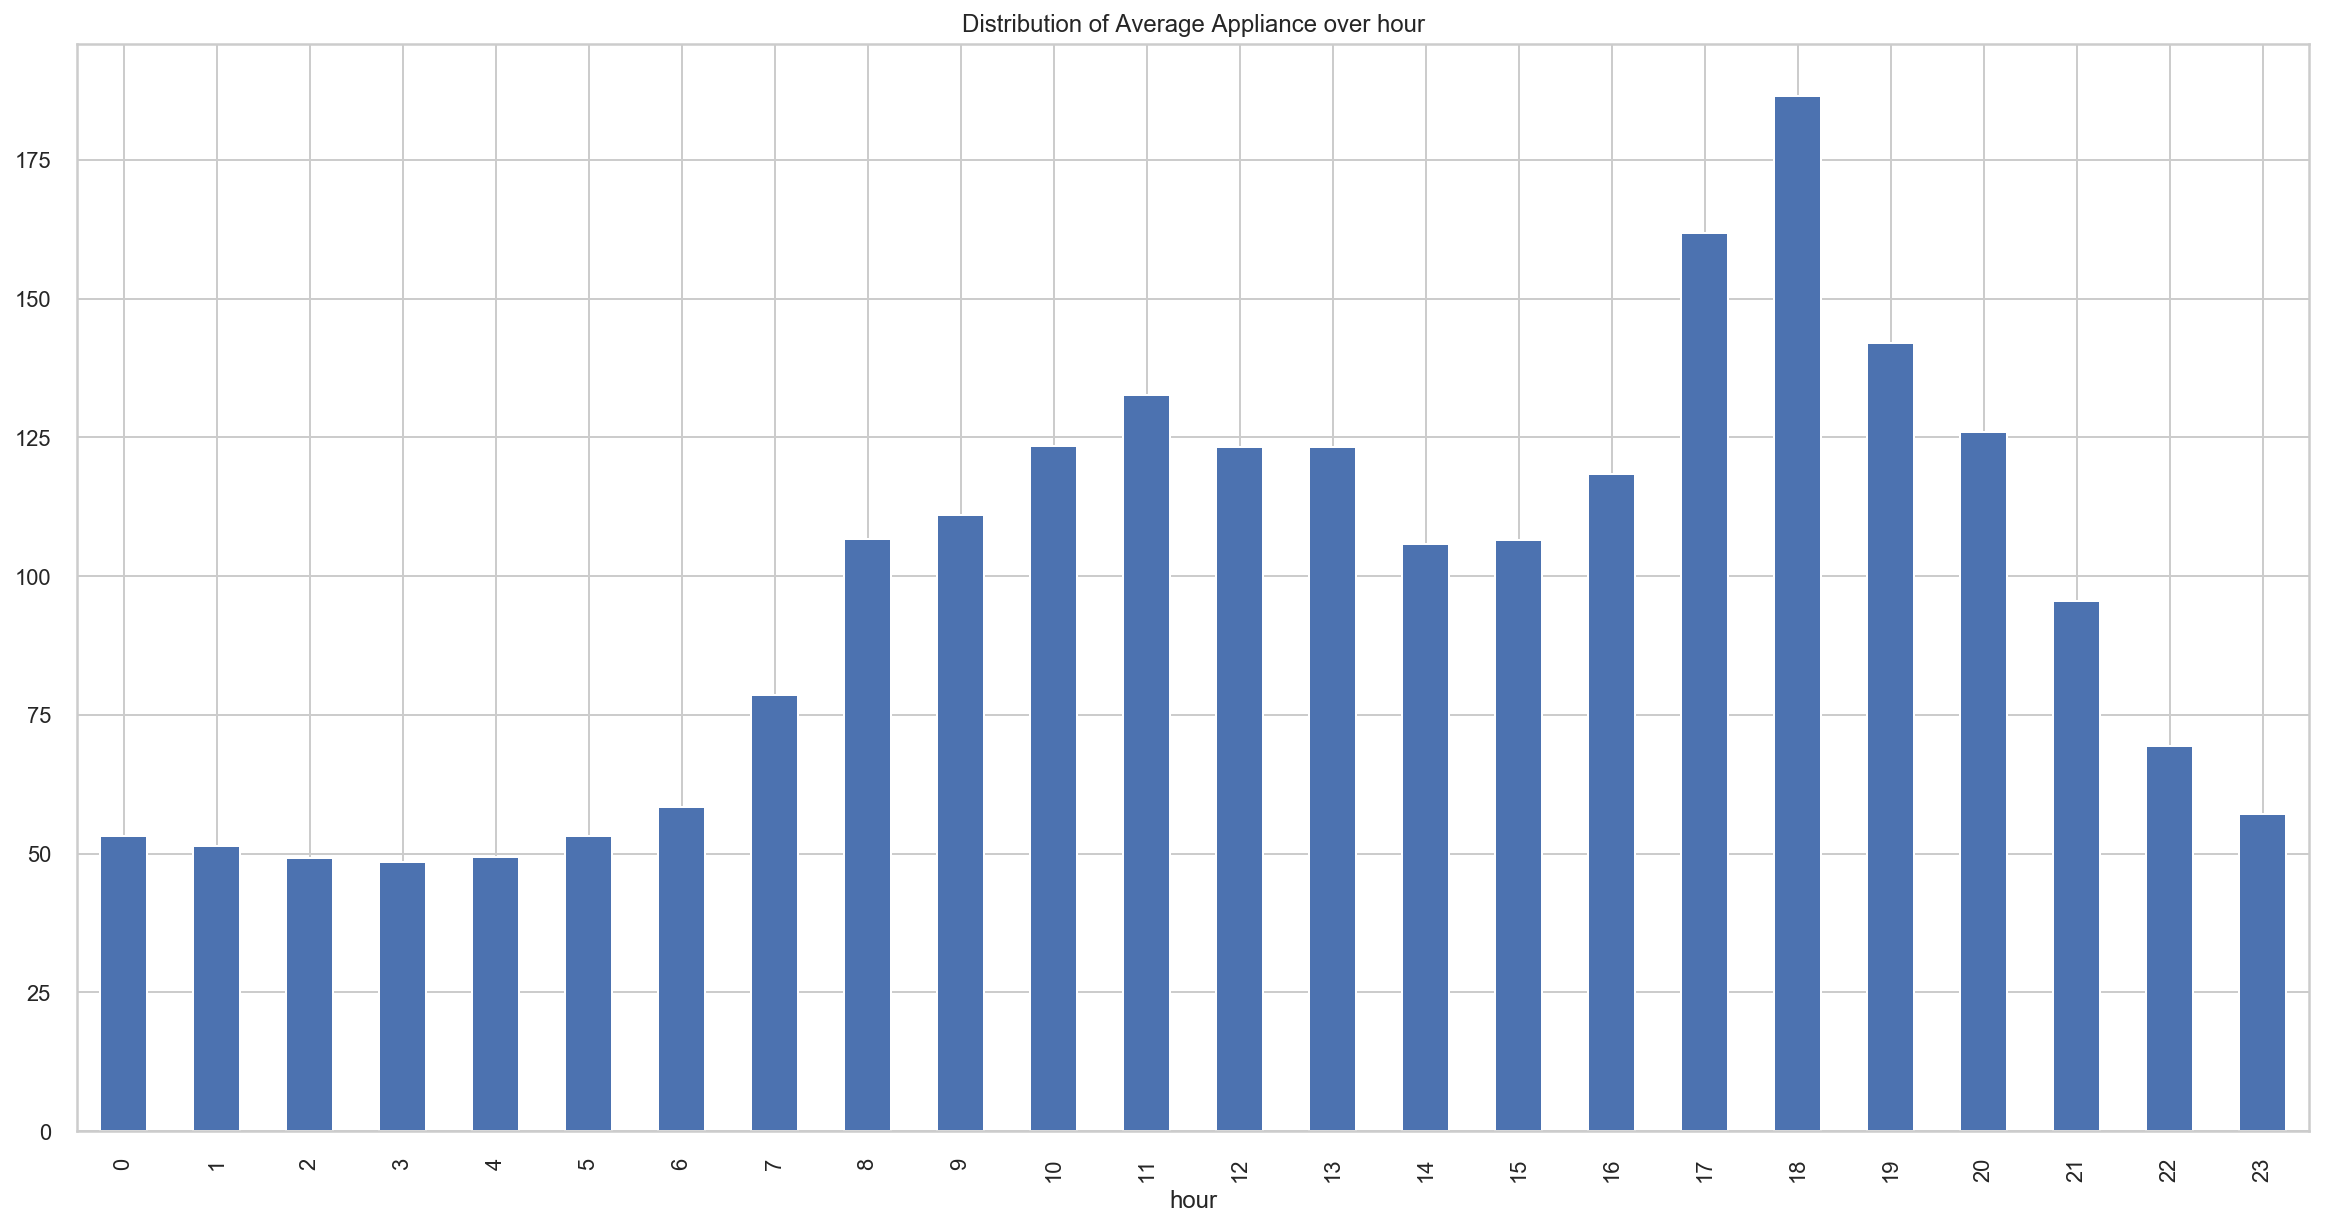

In [21]:
Ostats.dist_over_time_interval(new_cp_df, 'Appliances', 'hour')

**Inference**  
The average energy consumed by Appliances by hour is interesting. The highest energy consumption at 6pm then drops drastically until 4am. And starts increasing by 5am. I assume that 5am is when people wake and start using appliances other than baseline appliances. it goes up until 11am then starts dropping until 2pm. There are a lot of hypothesis that could be developed to test why this pattern.

#### Imputing Missing values

In [22]:
new_df = Ostats.impute_missing(df, 'date','median')

I1003 13:06:39.088498 4673914304 logger.py:27] Run Successful


**Inference**   
To be able to use the dataset for building machine learning model that be used to predict energy consumption of Appliances, missing values have to be removed or imputed. I decided to impute since almost every column in the dataset has missing values. Imputation uses average/median of the dataset by column to fill the missing if the data is continuous variable whereas mode is used for categorical variables. I choose median strategy to fill the missing values becuase it is less prone to outlier which is common when Mean is used for calculation.

#### Statistical Normality Test
It is good to know if the data is drawn from a guassian distribution. From stastical point of view, I will interpret the p-value as:
    
* p <= alpha: reject Null Hypothesis, H0, not normal.
* p > alpha: fall to reject H0, normal.

In [23]:
Ostats.normality_test(new_df, 'Appliances')

I1003 13:06:39.196976 4673914304 logger.py:27] Run Successful


Stats=14573.47321880285, p=0.0
Data does not appear qaussian then we should reject H0 @ 0.0


**Inference**: 

This got me thinking that data is skewed. I need to check for level of kurtosis and skewness.

#### Determine Skewness and Kurtosis

I1003 13:06:39.381578 4673914304 logger.py:27] Run Successful


Kurtosis of normal distribution: 14.930258572692253

Skewness of normal distribution: 3.532340928160051


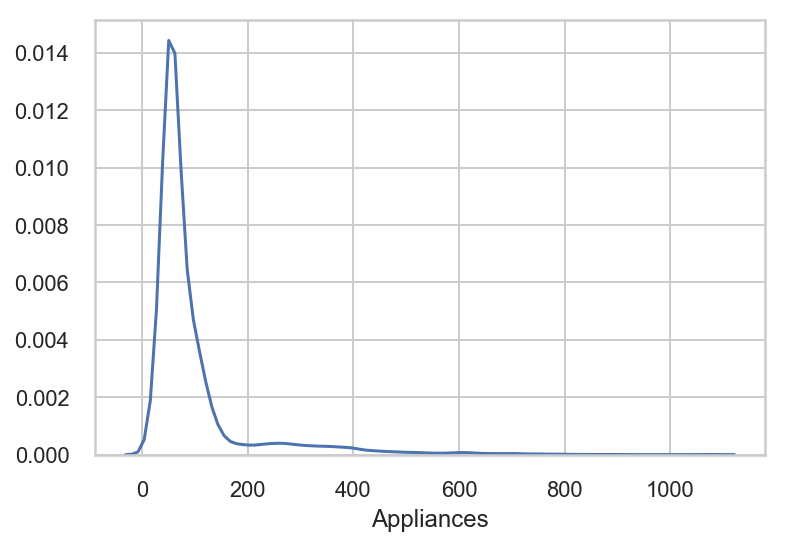

In [24]:
Ostats.kurtosis_n_skew_dist(new_df, 'Appliances')

**Inference**     
The value of kurtosis indicates that the distribution is heavier at tail becuase it is greater than 0.  Normal Distribution has a kurtosis of close to 0.  
Skewness is measured the asymmetry of the distribution. It is heavily skewed to the left.

#### Split the dataset into Features and Target variables to determine Correlation and Mutual information

In [25]:
X,y = Ostats.split_withot_date(new_df, 'date', 'Appliances')

I1003 13:06:39.963353 4673914304 logger.py:27] Run Successful


#### Determine Pearson Correlation independent variables with dependent variable, Appliances

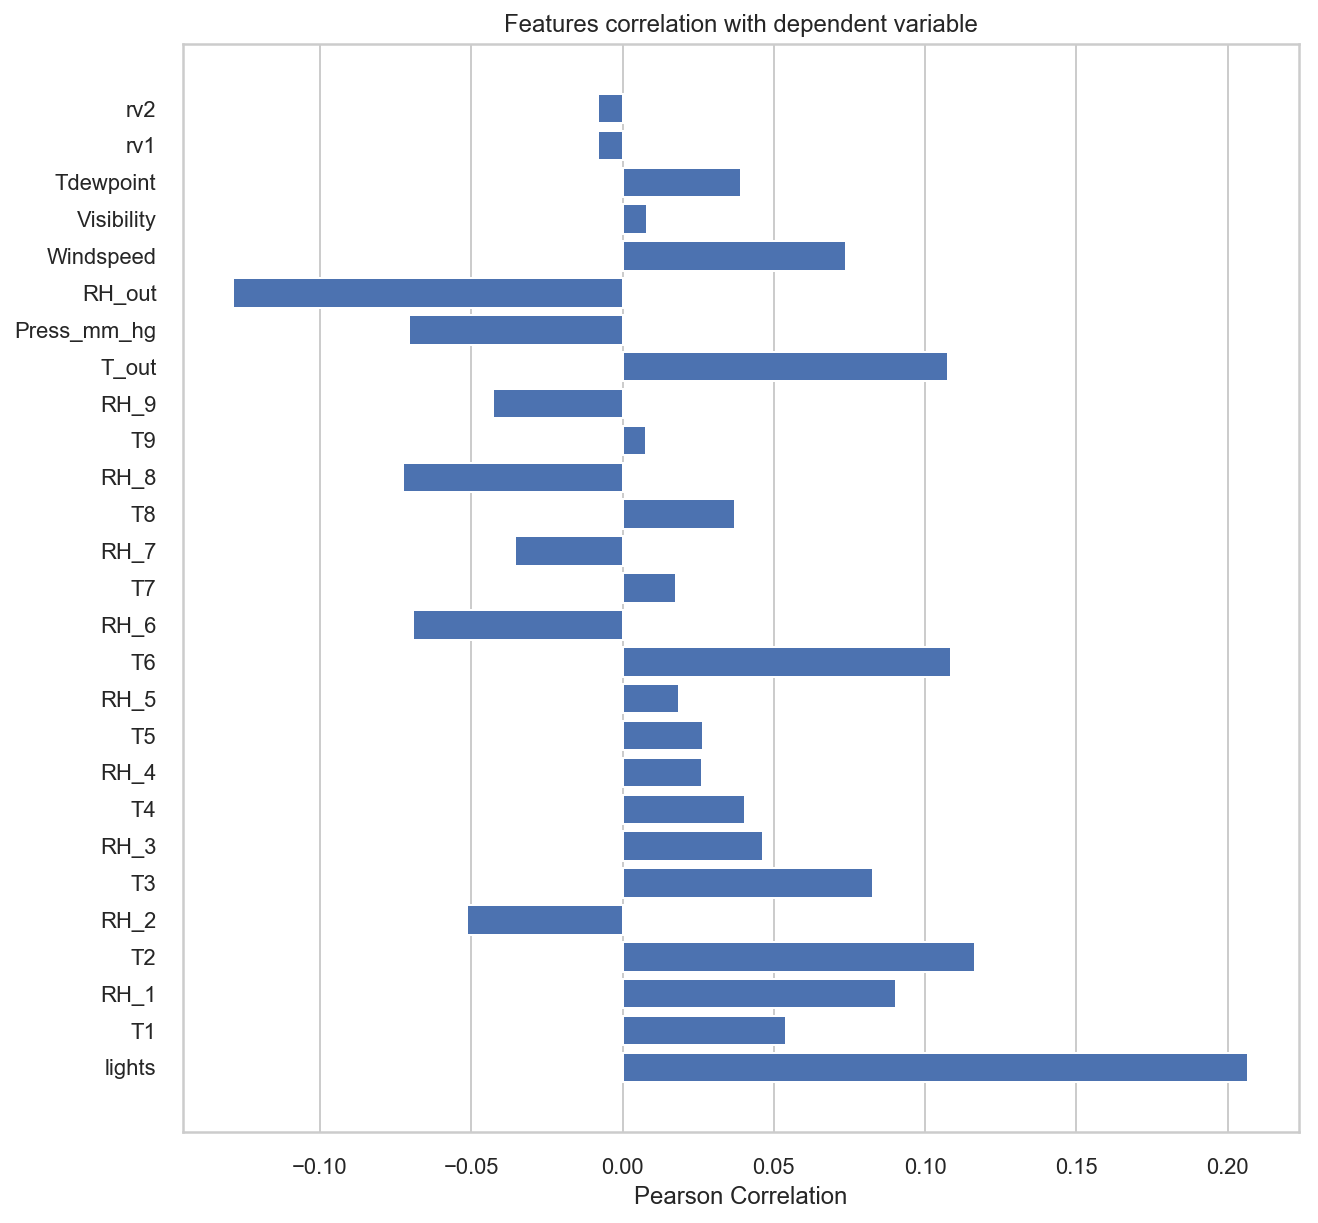

I1003 13:06:41.184995 4673914304 logger.py:27] Run Successful


In [26]:
Ostats.corr_mutual_info_with_target(X,y)

**Inference**  
The chart indicates level of correlation of independent variables with dependent variable(Appliances). lights has highest positive correlation with Appliances where RH_out has hightest negative correlation with Appliances. The less correlated variables may not make significant impact on estimated function that will be used to predict Appliances

#### Determine Mutual Information Independent variables between Dependent Variable

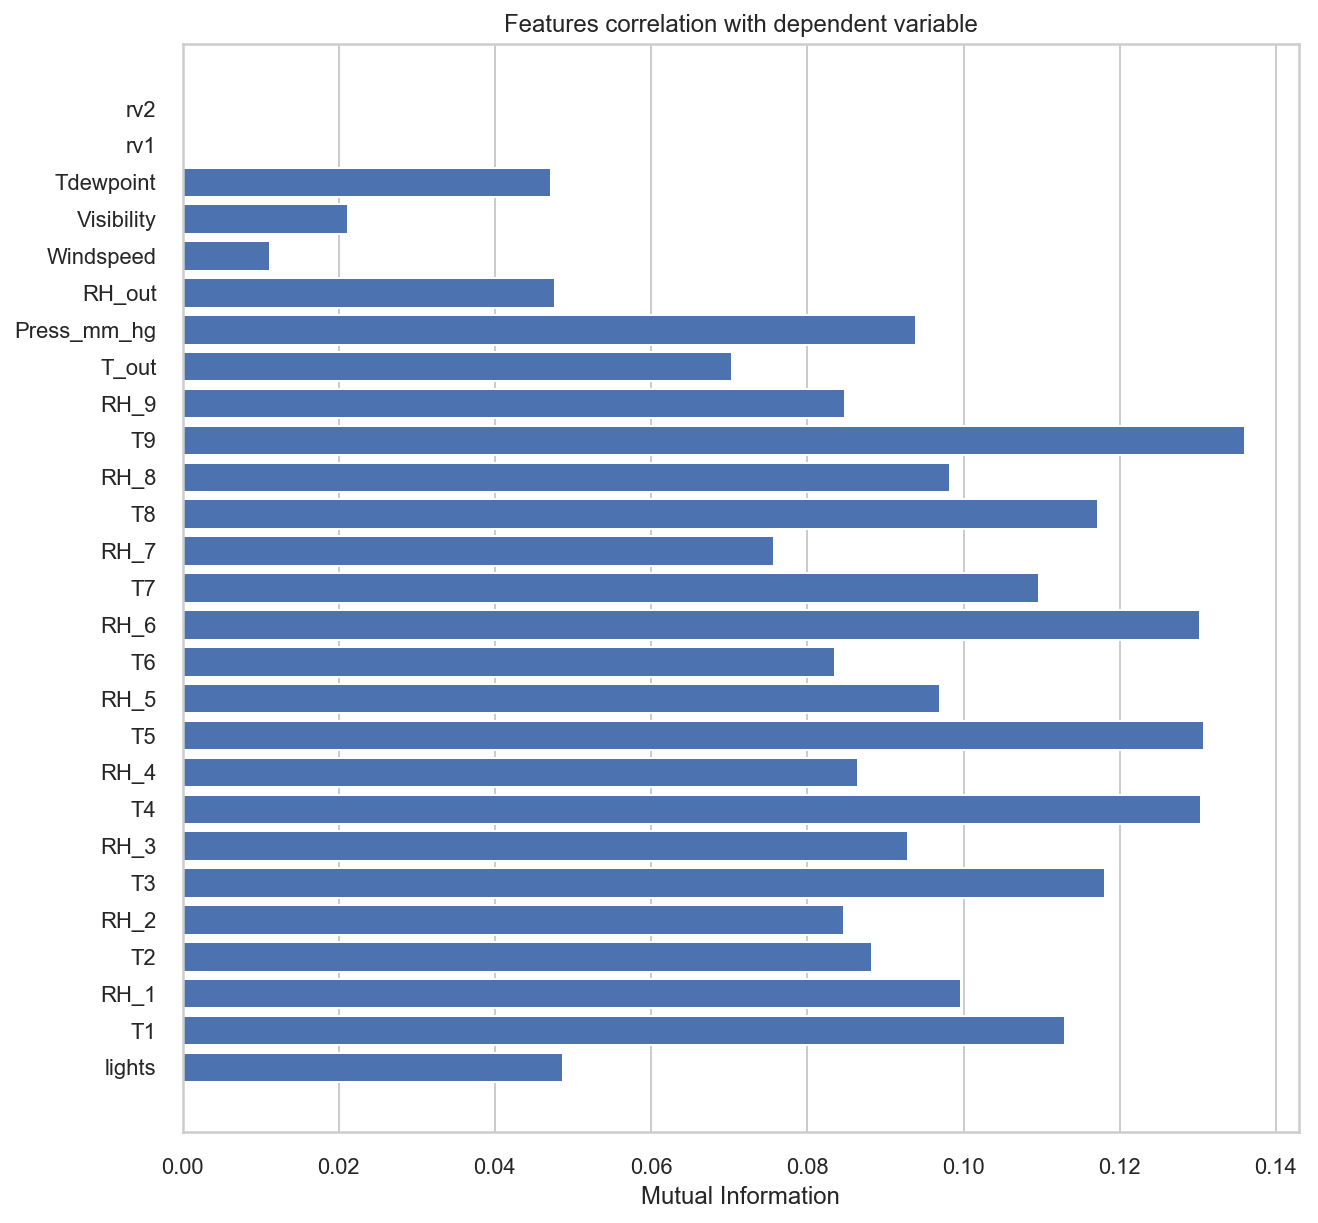

I1003 13:06:58.392318 4673914304 logger.py:27] Run Successful


In [27]:
Ostats.corr_mutual_info_with_target(X,y, 'mutual_info-regression')

**Inference**  
Unlike Correlation which is a linear distance between two random variables, Mutual information is a distance between two probability distributions. T(s) variables tend to have higher mutual information with Appliances. T9, for instance, is less correlated with Appliances but has higestest mutual information unlike rv1 and rv2 with no mutual information and less correlations. 

### Build Regression using using LSTM (Long short Term Memory)
1. Since Appliances I am trying to predict is a continuous variable, therefore, predictive model will be time-series regression model.
2. To be able to establish baseline score for a model, all the discovery insight I made about the dataset would not be considered. All the variables will be used.

LSTM is a recurrent neutral network algorithms that has capability to retain information as it travel time. And it requires set of transformation on the data. The following steps are required to perform LSTM:
1. The dataset has to be framed as a supervised learning regression problem and normalizing the input variables
2. The problem is predicting Appliances at the current 10 minutes (t) interval given other measurements at the prior time step.

#### Perform Tranformation on the dataset

In [28]:
# 1. make copy of the dataframe
new_df_cp = new_df.copy()

# 2. Set the date as index
new_df_cp.set_index('date', inplace=True)


# 3. Initialise class Transform from library "transformer" to an instance Transformer
Transformer = Transform(new_df_cp)

#4. using design_supervised method from class Transform the data into the format for LSTM
new_df_cp = Transformer.design_supervised()


new_df_cp.head()

I1003 13:06:58.472360 4673914304 logger.py:27] Run Successful
I1003 13:06:58.495954 4673914304 logger.py:27] Run Successful


var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1  0.046729   0.428571   0.327349   0.566187   0.225345   0.682849    
2  0.046729   0.428571   0.327349   0.541326   0.225345   0.680944    
3  0.037383   0.428571   0.327349   0.530502   0.225345   0.678239    
4  0.037383   0.571429   0.327349   0.524080   0.225345   0.677204    
5  0.046729   0.571429   0.327349   0.531419   0.225345   0.675510    

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var19(t)  var20(t)  \
1  0.215833   0.746066   0.351351   0.764262    ...  0.457856  0.678532   
2  0.215833   0.748871   0.351351   0.782437    ...  0.219563  0.676049   
3  0.215833   0.755569   0.344745   0.778062    ...  0.219563  0.671909   
4  0.215833   0.758685   0.341441   0.770949    ...  0.219563  0.671909   
5  0.215833   0.758685   0.341441   0.762697    ...  0.219563  0.667356   

   var21(t)  var22(t)  var23(t)  var24(t)  var25(t)  var26(t)  var27(t)  \
1  0.369239  0.100000  0.894737  0.476190  0.600000  0.533937  0.372083   
2  0.365488  0.623257  0.894737  0.452381  0.835897  0.529412  0.572848   
3  0.361736  0.104652  0.785088  0.428571  0.776923  0.524887  0.908261   
4  0.357985  0.106977  0.785088  0.404762  0.717949  0.520362  0.201611   
5  0.354234  0.109303  0.894737  0.380952  0.658974  0.515837  0.898441   

   var28(t)  
1  0.372083  
2  0.572848  
3  0.908261  
4  0.201611  
5  0.898441  

[5 rows x 56 columns]

#### Model Architecture
A library model with class Model is created with methods to split dataset to training and testing set, and training with capability to perform early stop. The Tensorboard will be generated.
The following configuration is generated:  
1. Define the LSTM with 100 neurons in the first hidden layer and 1 neuron in the output layer for predicting Global_active_power. The input shape will be 1 time step with 56 features.
2. Dropout 20% to control overfitting.
3. Use the MSE loss function and the efficient Adam version of stochastic gradient descent.
4. The model will be fit for 20 training epochs with a batch size of 70 which would be parameters for the class Model

In [29]:
# 5. Create paramters with epochs set to 20 and batch size to 70. Epochs is number of iteration whereas batch size is the number of sample of trainingset that be trained in each epoch
params = {'epochs':20, 'batch_size':70}

# 6. Initialise Model by create an instance
Regressor = Model(new_df_cp.values,params)

# 7. Split the transformed data into training and testing set. Although I do not need to call this method. The method would be called withing train_model method
train_X,test_X, train_y, test_y  = Regressor.split_train_test()

# 8. Call train_model which would return model itself and history which would allow us to stuff that tensorboard would do
model, history = Regressor.train_model()

I1003 13:06:58.573523 4673914304 logger.py:27] Run Successful
I1003 13:06:58.575034 4673914304 logger.py:27] Run Successful
I1003 13:06:59.055687 4673914304 logger.py:27] Run Successful


Train on 13814 samples, validate on 5920 samples
Epoch 1/20
13814/13814 - 3s - loss: 0.1199 - root_mean_squared_error: 0.1721 - val_loss: 0.0266 - val_root_mean_squared_error: 0.0347
Epoch 2/20
13814/13814 - 1s - loss: 0.0414 - root_mean_squared_error: 0.0534 - val_loss: 0.0257 - val_root_mean_squared_error: 0.0319
Epoch 3/20
13814/13814 - 1s - loss: 0.0326 - root_mean_squared_error: 0.0429 - val_loss: 0.0171 - val_root_mean_squared_error: 0.0215
Epoch 4/20
13814/13814 - 1s - loss: 0.0289 - root_mean_squared_error: 0.0383 - val_loss: 0.0166 - val_root_mean_squared_error: 0.0199
Epoch 5/20
13814/13814 - 1s - loss: 0.0282 - root_mean_squared_error: 0.0371 - val_loss: 0.0117 - val_root_mean_squared_error: 0.0148
Epoch 6/20
13814/13814 - 1s - loss: 0.0286 - root_mean_squared_error: 0.0375 - val_loss: 0.0166 - val_root_mean_squared_error: 0.0203
Epoch 7/20
13814/13814 - 1s - loss: 0.0267 - root_mean_squared_error: 0.0353 - val_loss: 0.0157 - val_root_mean_squared_error: 0.0187
Epoch 8/20
13

In [32]:
%tensorboard --logdir logs

**Inference**  
The RMSE is 0.0435 on Validation. The is amazing for baseline model

### Actual Vs Prediction

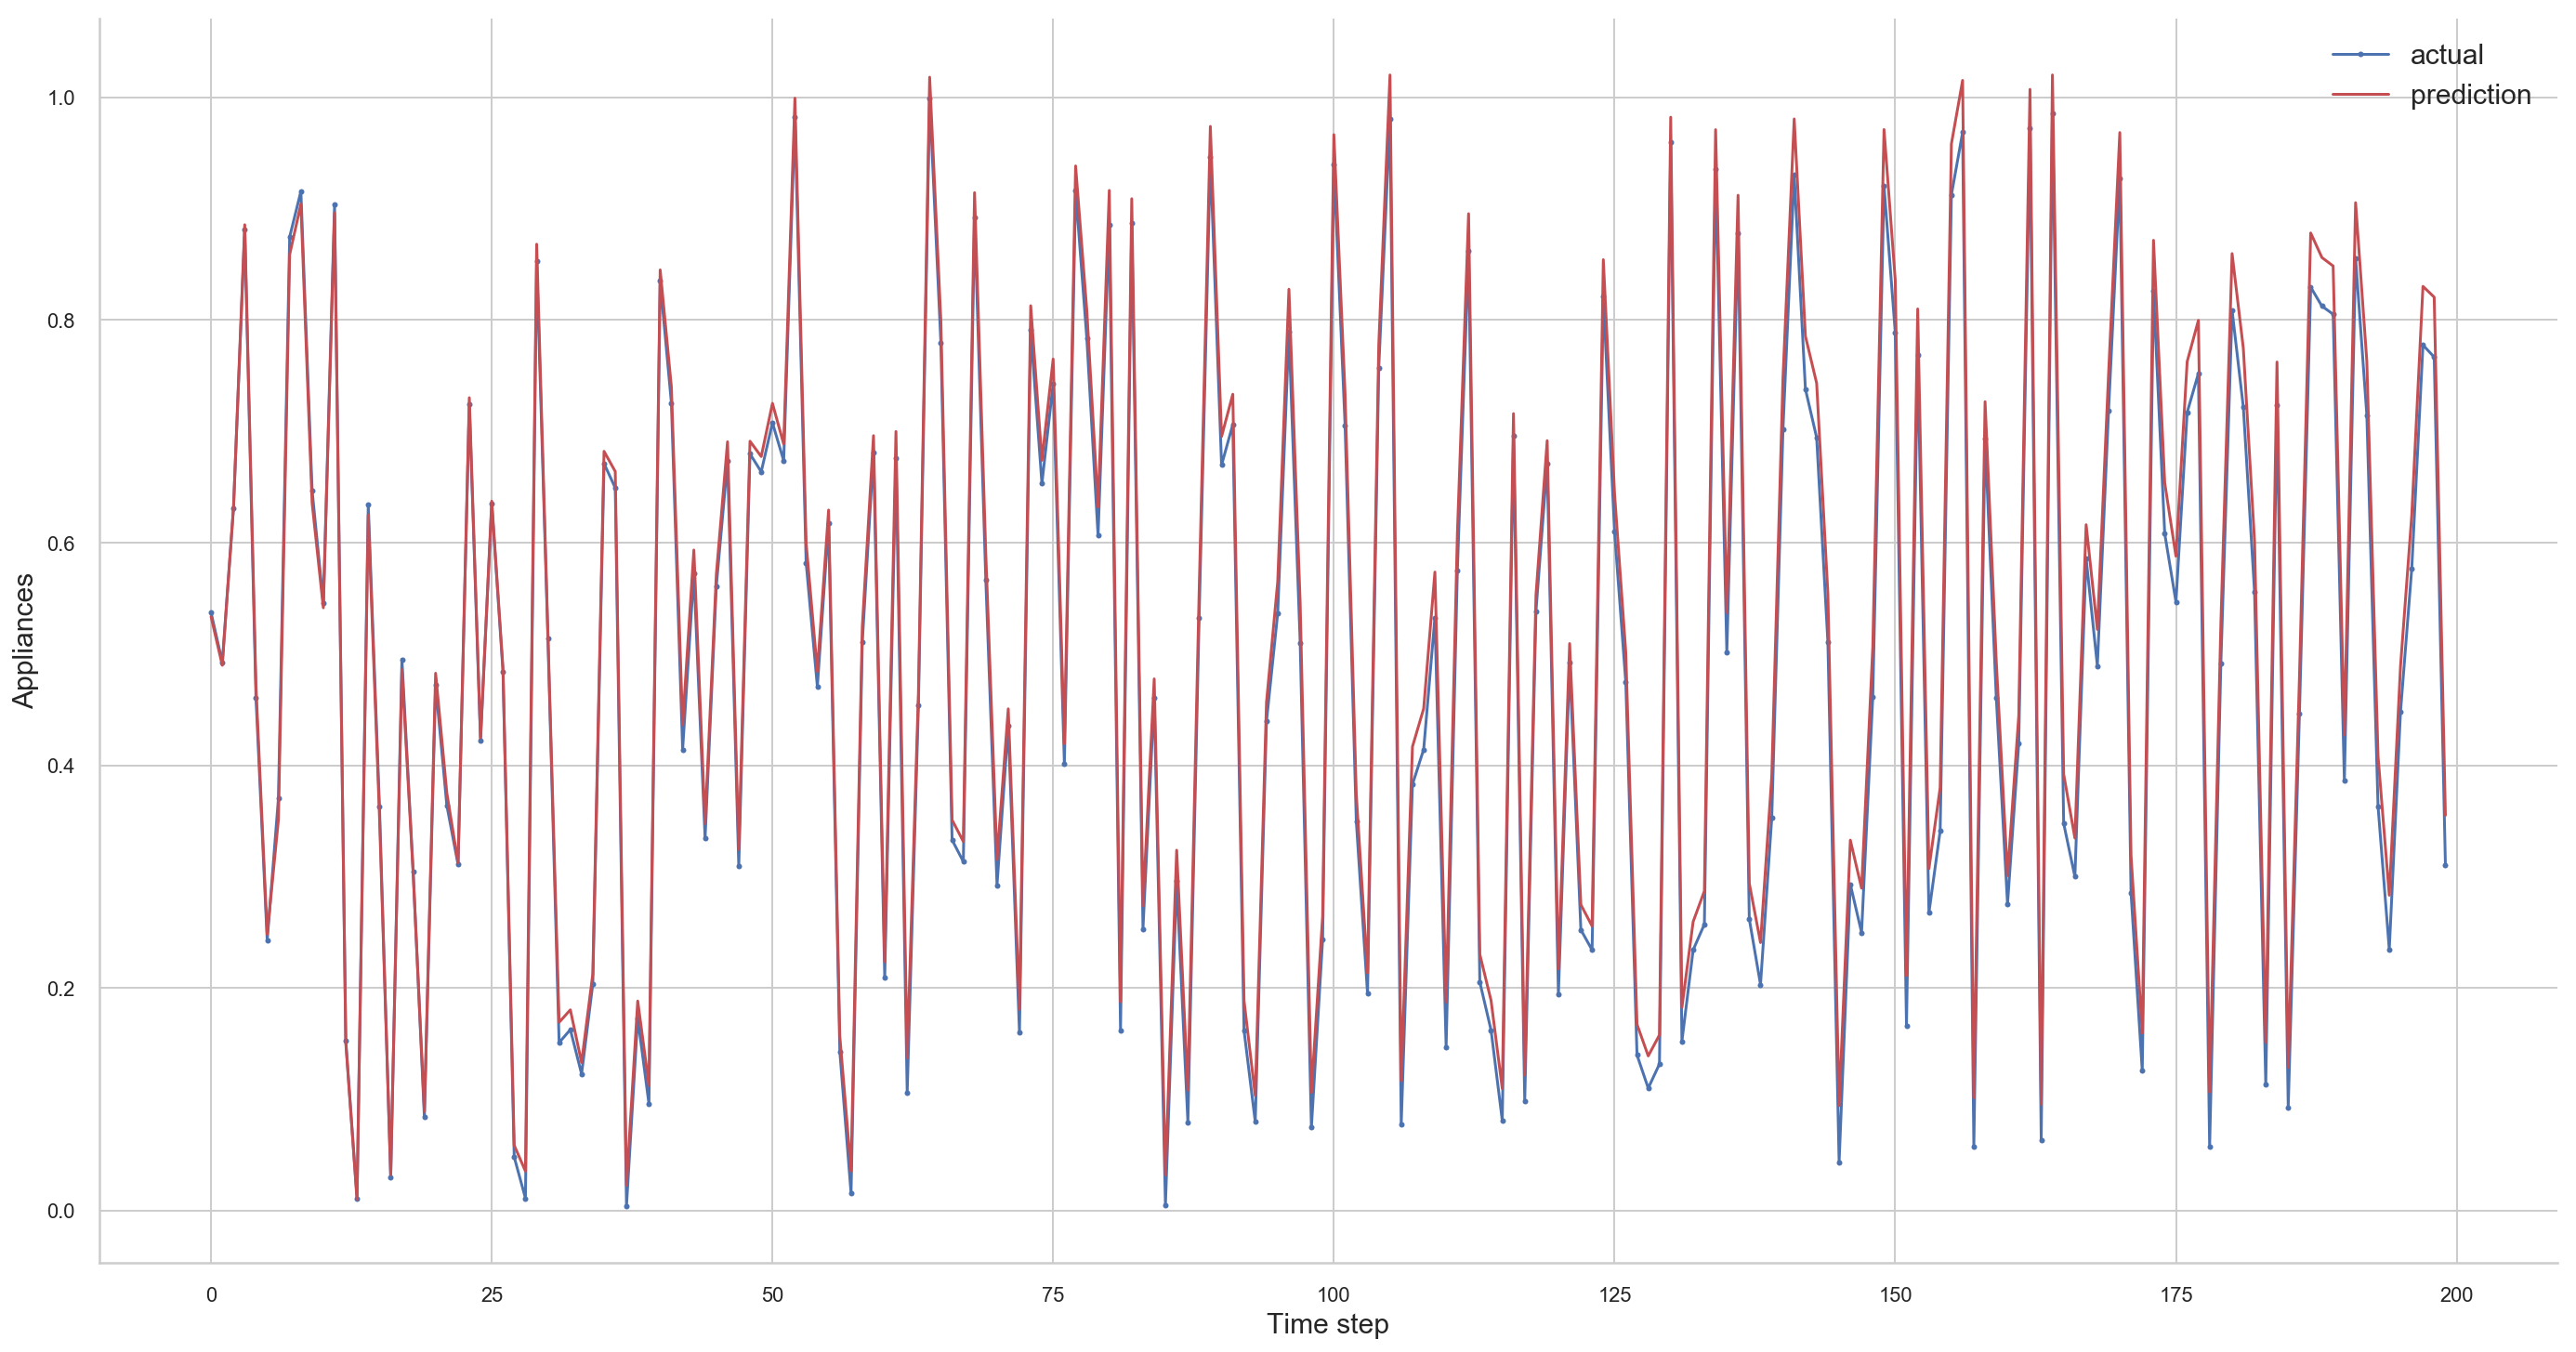

In [33]:
def actual_vs_predictions():
    test_prediction = model.predict(test_X)
    length=[x for x in range(200)]
    plt.figure(figsize=(20,10))
    plt.plot(length, test_y[:200], marker='.', label="actual")
    plt.plot(length, test_prediction[:,0][:200], 'r', label="prediction")
    # plt.tick_params(left=False, labelleft=True) #remove ticks
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Appliances', size=15)
    plt.xlabel('Time step', size=15)
    plt.legend(fontsize=15)
    plt.show()  


actual_vs_predictions()

**Inference**   
The prediction is almost close to the actual value.